In [2]:
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np

In [25]:
vocabulary_size = 10000
num_tags = 100
num_length = 1000
num_departments = 4
num_samples = 1280
num_dificulty = 3

title = keras.Input(shape=(vocabulary_size,), name="title")
text_body = keras.Input(shape=(vocabulary_size,), name="text_body")
tags = keras.Input(shape=(num_tags,), name="tags")
length = keras.Input(shape = (num_length,), name = 'length')

title_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
text_body_data = np.random.randint(0, 2, size=(num_samples, vocabulary_size))
tags_data = np.random.randint(0, 2, size=(num_samples, num_tags))
length_data = np.random.randint(0, 2, size = (num_samples, num_length))

priority_data = np.random.random(size=(num_samples, 1))
department_data = np.random.randint(0, 2, size=(num_samples, num_departments))
dificulty_data = np.random.randint(0, 2, size = (num_samples, num_dificulty))
sentiment_data = np.random.random(size = (num_samples, 1))

In [27]:
# 왼쪽 만들기
concat1 = layers.Concatenate(name = 'concat1')([title, text_body])
dense1 = layers.Dense(256, activation = 'relu', name = 'dense1')(concat1)
dropout1 = layers.Dropout(0.5, name = 'dropout1')(dense1)
dense2 = layers.Dense(128, activation = 'relu', name = 'dense2')(dropout1)
# 오른쪽 만들기
concat2 = layers.Concatenate(name = 'concat2')([length, tags, text_body])
dense3 = layers.Dense(128, activation = 'relu', name = 'dense3')(concat2)
# 합치기
concat3 = layers.Concatenate(name = 'concat3')([dense2, dense3])
dense4 = layers.Dense(128, activation = 'relu', name = 'dense4')(concat3)
dropout2 = layers.Dropout(0.5, name = 'dropout2')(dense4)
final_dense = layers.Dense(64, activation = 'relu', name = 'final_dense')(dropout2)
# 출력층
priority = layers.Dense(1, activation = 'sigmoid', name = 'priority')(final_dense)
department = layers.Dense(4, activation = 'softmax', name = 'department')(final_dense)
difficulty = layers.Dense(3, activation = 'softmax', name = 'difficulty')(final_dense)
sentiment = layers.Dense(1, activation = 'sigmoid', name = 'sentiment')(final_dense)

mymodel = keras.Model(inputs = [title, text_body, length, tags],
                      outputs = [priority, department, difficulty, sentiment])

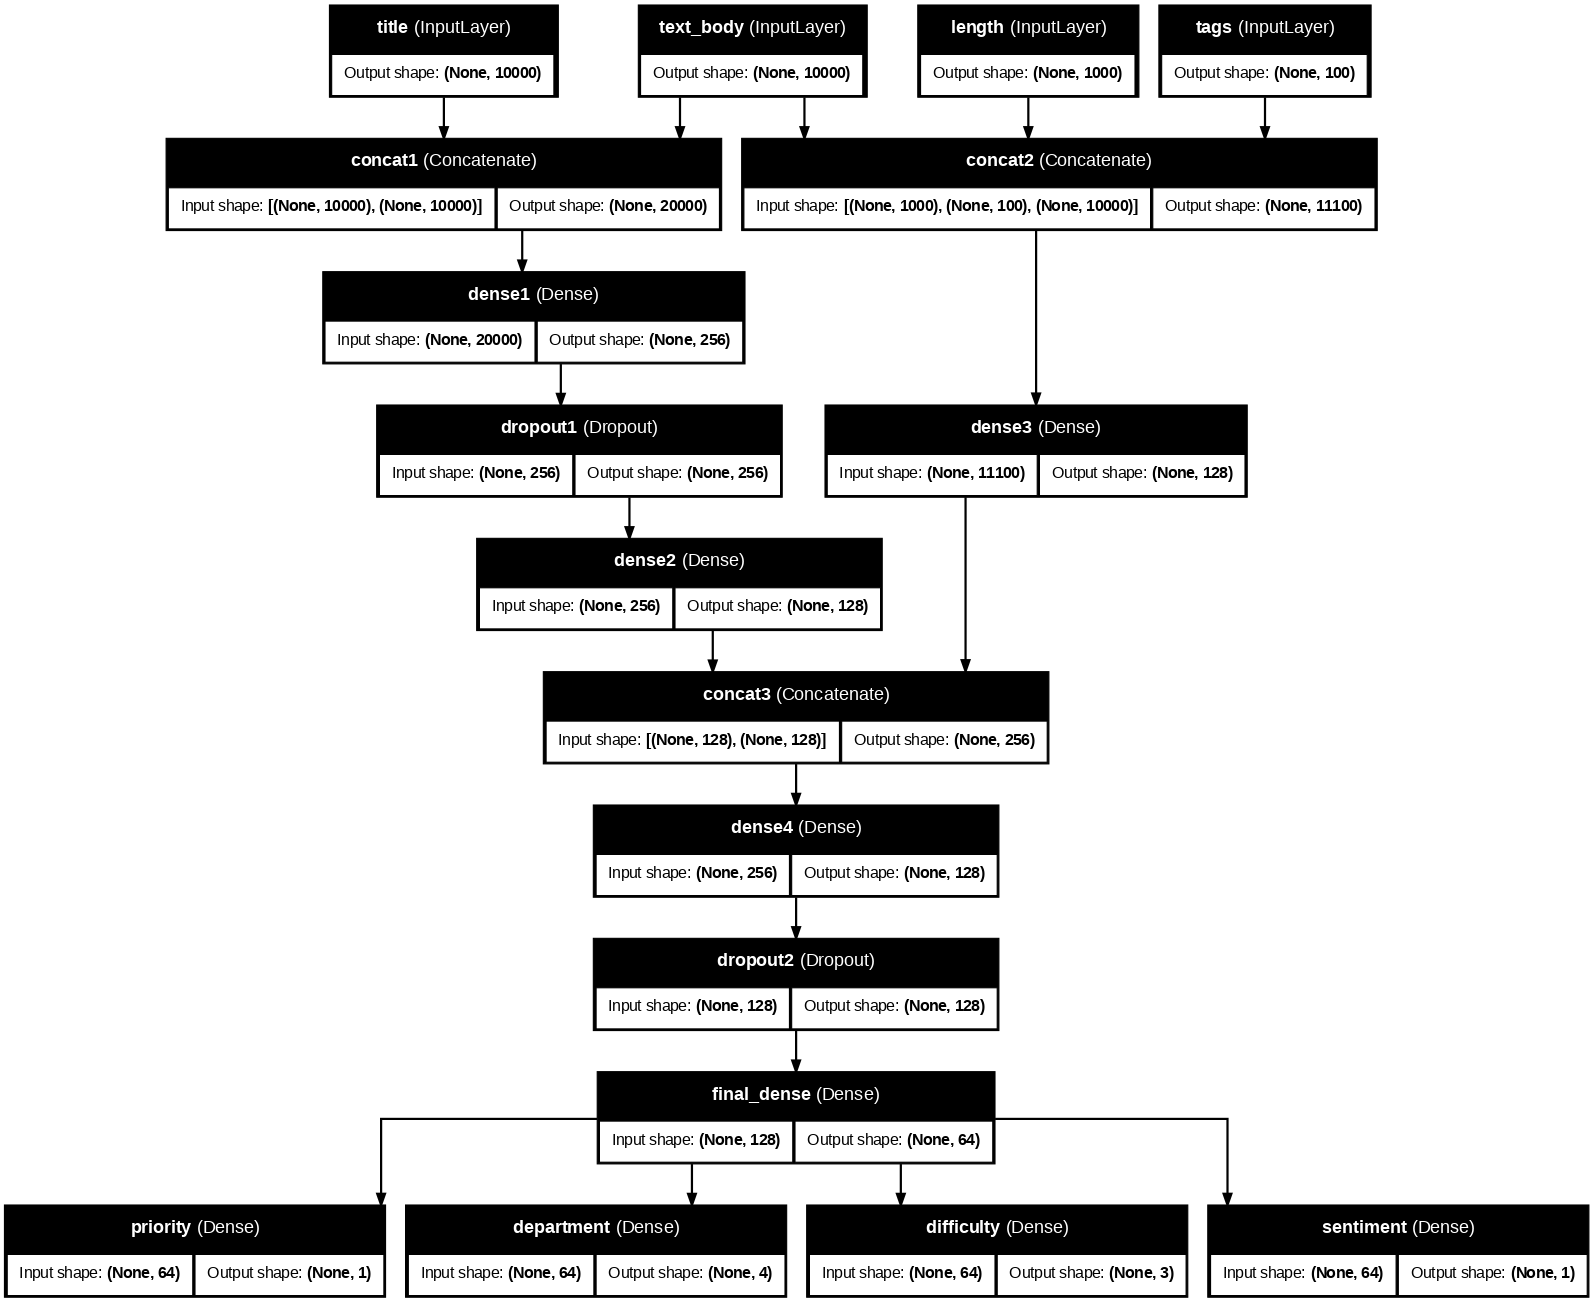

In [28]:
keras.utils.plot_model(mymodel, show_layer_names = 1, show_shapes = 1, dpi = 80)

In [29]:
mymodel.compile(
    optimizer = 'adam',
    loss = {'priority':'binary_crossentropy',
            'department':'categorical_crossentropy',
            'difficulty':'categorical_crossentropy',
            'sentiment':'binary_crossentropy'},
    metrics = {'priority':['mean_absolute_error'],
               'department':['accuracy'],
               'difficulty':['accuracy'],
               'sentiment':['mean_squared_error']
    }
)

In [31]:
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath = 'best_model.keras',
        save_best_only = 1
    )
]

In [33]:
mymodel.fit({'title': title_data,'text_body':text_body_data,'tags':tags_data,'length':length_data},
            {'priority':priority_data, 'department':department_data, 'difficulty':dificulty_data, 'sentiment':sentiment_data},
            epochs = 100,
            callbacks = callbacks,
            batch_size = 50)

Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - department_accuracy: 0.2566 - department_loss: 19241582.0000 - difficulty_accuracy: 0.3535 - difficulty_loss: 9138426.0000 - loss: 33807300.0000 - priority_loss: 2740487.7500 - priority_mean_absolute_error: 0.4965 - sentiment_loss: 2703362.7500 - sentiment_mean_squared_error: 0.3302
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - department_accuracy: 0.2670 - department_loss: 30366668.0000 - difficulty_accuracy: 0.2899 - difficulty_loss: 18409560.0000 - loss: 56803372.0000 - priority_loss: 3859849.5000 - priority_mean_absolute_error: 0.5049 - sentiment_loss: 4202762.0000 - sentiment_mean_squared_error: 0.3190
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - department_accuracy: 0.2914 - department_loss: 40287952.0000 - difficulty_accuracy: 0.3344 - difficulty_loss: 30484608.0000 - loss: 81191632.0000 - priority_loss: 6135858.5000 - priority_mean_absolute_error: 0.4921 - sentiment_loss: 4288416.0000 - sentiment_mean_square